In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score
)
import joblib


In [75]:
df = pd.read_csv("diabetes.csv")  # Make sure the file is in the same directory
print(df.shape)
df.head()


(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Outcome
0    500
1    268
Name: count, dtype: int64


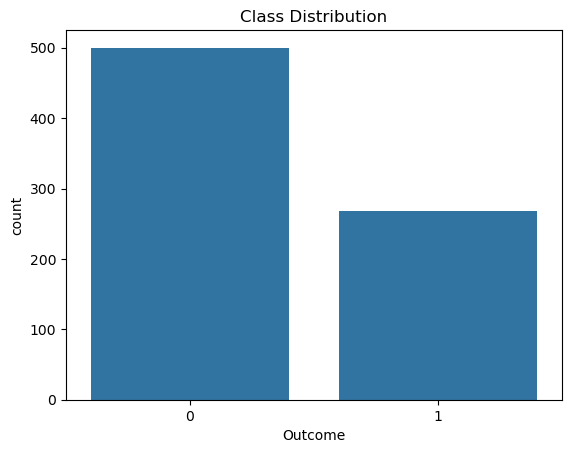


Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [77]:
print(df['Outcome'].value_counts())

sns.countplot(x='Outcome', data=df)
plt.title("Class Distribution")
plt.show()

print("\nMissing Values:\n", df.isnull().sum())


In [79]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


In [81]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


In [85]:
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', random_state=42)

In [87]:
joblib.dump(model, "logistic_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [89]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # For ROC


In [91]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7337662337662337


In [93]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.75      0.79       100
           1       0.60      0.70      0.65        54

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154



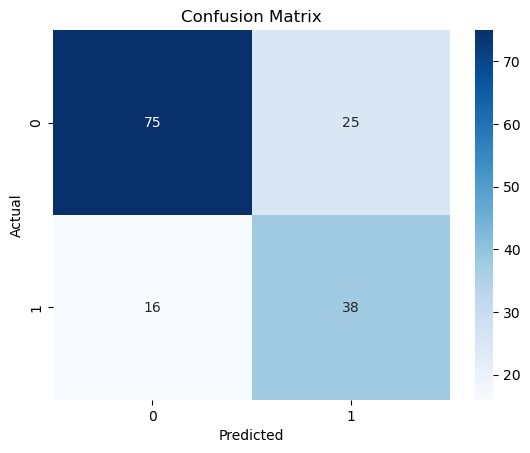

In [95]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


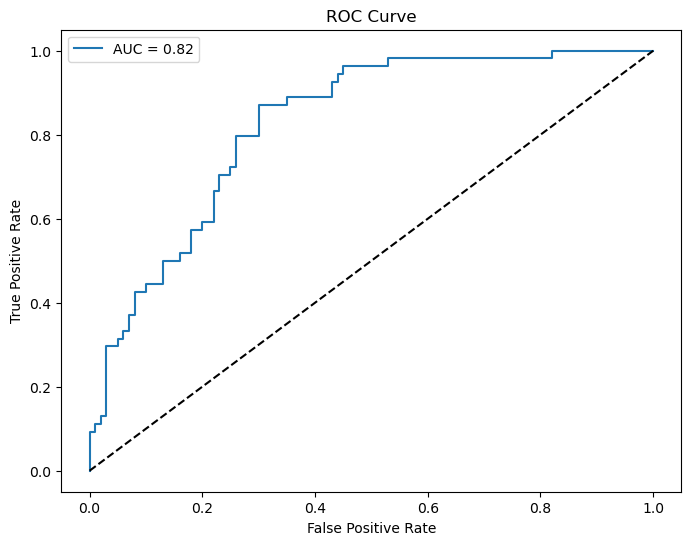

In [97]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [99]:
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
print(comparison_df.head(10))


   Actual  Predicted
0       0          1
1       0          0
2       0          0
3       1          0
4       0          0
5       0          0
6       1          1
7       1          1
8       0          0
9       0          1


In [101]:
# Predict using 1st row as sample input
sample = df.drop("Outcome", axis=1).iloc[0]
sample_df = pd.DataFrame([sample], columns=df.columns[:-1])
sample_scaled = scaler.transform(sample_df)
predicted_class = model.predict(sample_scaled)

print("Predicted:", predicted_class[0], "| Actual:", df['Outcome'].iloc[0])


Predicted: 1 | Actual: 1
